**Hello** class.

I’ve been trying to decide which framework to recommend for the implementations of CS419.

OpenCV: has been around a long time, it’s a well documented computer vision library, widely used in the industry, with an extensive set of functionalities; HOWEVER, it’s C/C++ based, with python wrappers, and a bit complex at times/often.

Pillow (PIL): is an image manipulation library, native to python, with a simpler and easier to use interface and a more merciful learning curve.

Although PIL is the right choice from a pedagogical perspective, in the long term OpenCV makes more sense, since we’ll need it next semester during EE417 as well. And PIL will be insufficient for our needs then. That is why I’ve decided to go with OpenCV.

As senior students, I’ll leave it to you to find the proper instructions corresponding to your OS for installing opencv-python, in case you prefer an offline native setup.

Alternatively, you can always work directly online on a colab notebook, where everything is preinstalled, just import the necessary packages and you are good to go (this is recommended, for now).

I recommend looking into any of the gazillion tutorials out there on opencv-python as my examples will be strictly limited with the concepts we see each week in class. OpenCV has MUCH more to offer.

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://drive.google.com/uc?id=15joIJovbkJjQwhk9VSomXfOAG-DxSsn3 -O tortoiseTrainer.jpg

--2024-09-25 08:16:45--  https://drive.google.com/uc?id=15joIJovbkJjQwhk9VSomXfOAG-DxSsn3
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15joIJovbkJjQwhk9VSomXfOAG-DxSsn3 [following]
--2024-09-25 08:16:46--  https://drive.usercontent.google.com/download?id=15joIJovbkJjQwhk9VSomXfOAG-DxSsn3
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153271 (150K) [image/jpeg]
Saving to: ‘tortoiseTrainer.jpg’

tortoiseTrainer.jpg 100%[===================>] 149.68K  --.-KB/s    in 0.03s   

2024-09-25 08:16:48 (5.81 MB/s) - ‘tortoiseTrainer.jpg’ 


# 1. Loading, Displaying,Saving, and Getting Height and Width









In [ ]:
# importing necessary packages
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

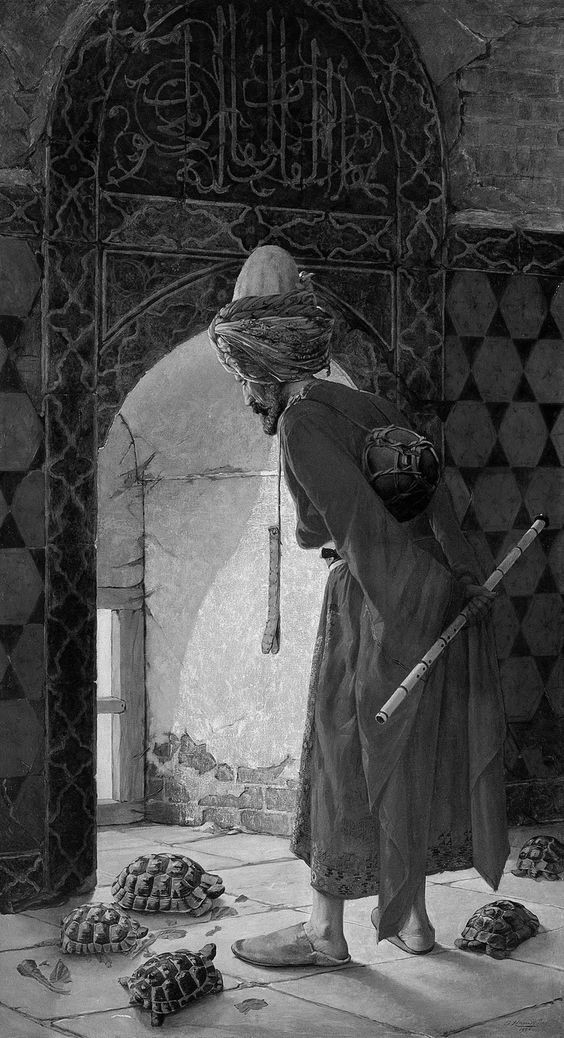

"\n\nIf you're using OpenCV-Python on your local machine instead of Google Colab, \nuse the following code to display image\n\ncv2.imshow('The Tortoise Trainer, by Osman Hamdi bey', image)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n\n"

In [ ]:
# Load the image in grayscale mode
image = cv2.imread('tortoiseTrainer.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image using OpenCV
cv2_imshow(image)

"""

If you're using OpenCV-Python on your local machine instead of Google Colab,
use the following code to display image

cv2.imshow('The Tortoise Trainer, by Osman Hamdi bey', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

"""


In [ ]:
totalPixels = image.size # total number of pixels in the image (height * width)
(height, width) = image.shape
dataType = image.dtype # data type of the image (usually uint8 for 8-bit images)
print("Number of pixels in the image: ", totalPixels)
print("The heignt of the image: ", height)
print("The width of the image: ", width)
print("The data type of the image: ", dataType) # uint8, meaning pixel values range from 0-255

Number of pixels in the image:  585432
The heignt of the image:  1038
The width of the image:  564
The data type of the image:  uint8


In [ ]:
# Save the image with a different name and format (e.g., saving as PNG format)
# 'output.png' is the new file name, and 'image' is the image matrix to be saved
cv2.imwrite("output.png", image)

True

# 2. Cropping a Grayscale Image and Displaying the Cropped Section

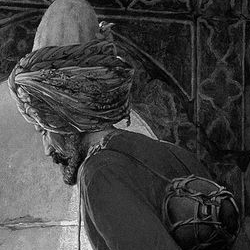

In [ ]:
# Crop a region of the image (e.g., from (250, 500) to (200, 450))
croppedImage = image[250:500, 200:450]
cv2_imshow(croppedImage)

# 3.  Error When Accessing an Invalid Pixel

In [ ]:
try:
    # Trying to access an invalid pixel (out of bounds)
    invalidPixel = image[1040, 100]
except IndexError as e:
    print(f"Error: {e}")

Error: index 1040 is out of bounds for axis 0 with size 1038


# 4. Iterating Over Each Pixel of the Grayscale Image and Modifying Them

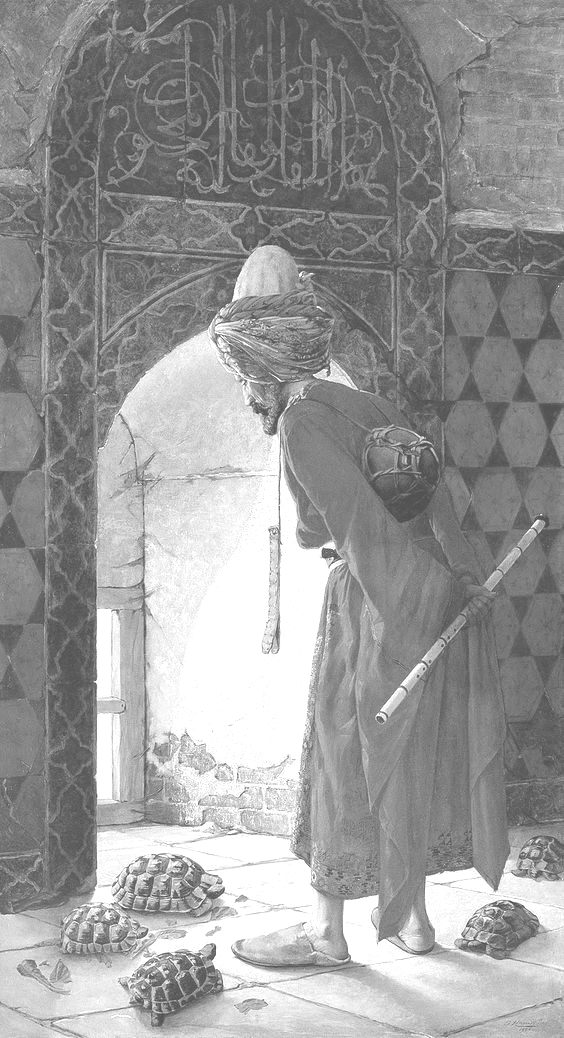

In [ ]:
# load image
image = cv2.imread('tortoiseTrainer.jpg', cv2.IMREAD_GRAYSCALE)

# Iterate over each pixel in the image and increase brightness by adding 80 to each pixel value
# Ensure pixel values do not exceed the maximum allowed value of 255 (for an 8-bit image)
for row in range(height):
    for col in range(width):
        # Add 80 to the pixel value while ensuring it doesn't exceed 255
        image[row, col] = min(image[row, col] + 80, 255)

cv2_imshow(image)

# 5. Reducing Grayscale Image Resolution with Nearest Neighbor (Boxy Effect)

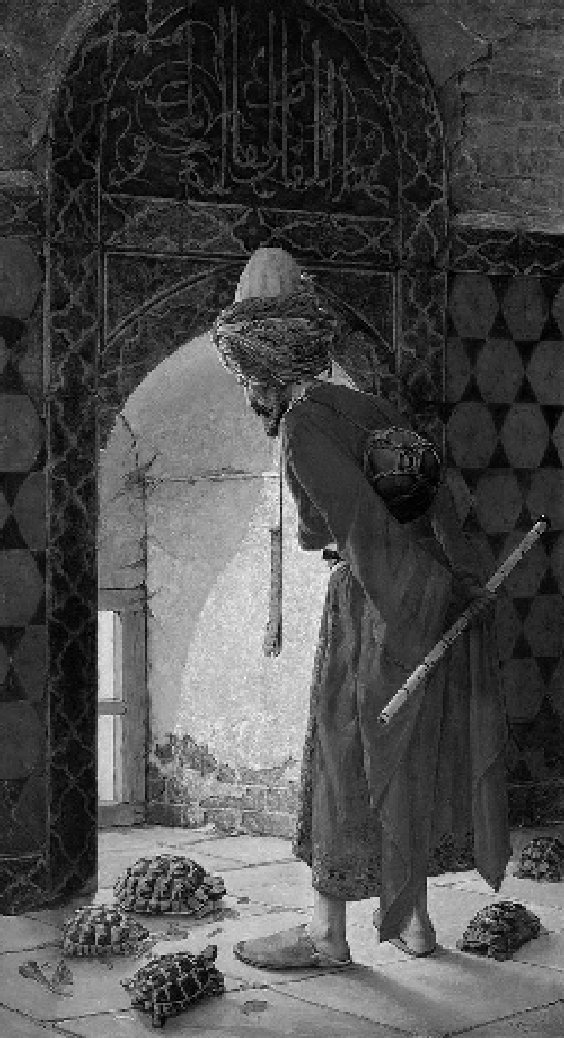

In [ ]:
# load image
image = cv2.imread('tortoiseTrainer.jpg', cv2.IMREAD_GRAYSCALE)

smallImage = cv2.resize(image, (250, 500), interpolation=cv2.INTER_NEAREST)
boxyImage = cv2.resize(smallImage, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

cv2_imshow(boxyImage)

# 6. Reducing Bit Resolution of a Grayscale Image (Image Quality Deterioration)

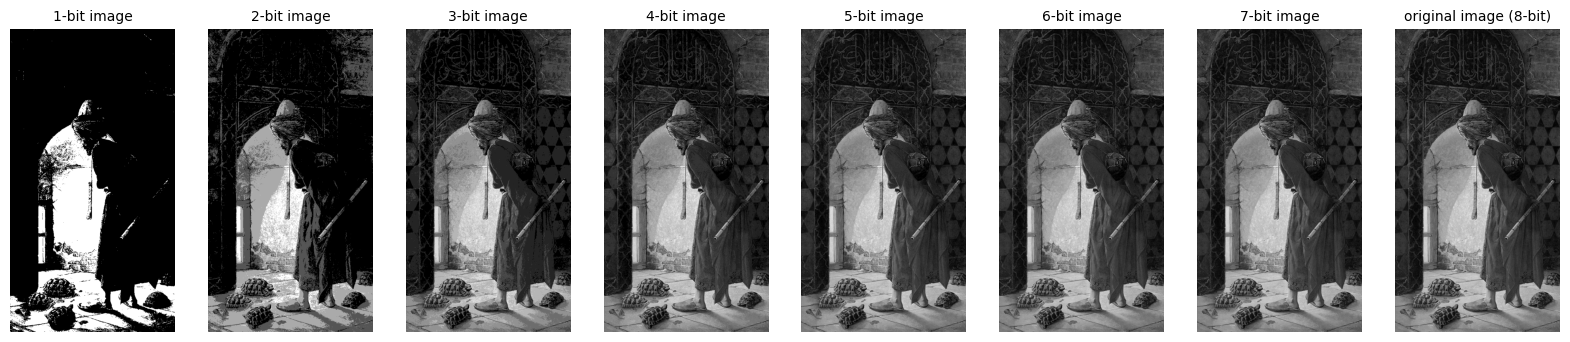

In [ ]:
# load image
image = cv2.imread('tortoiseTrainer.jpg', cv2.IMREAD_GRAYSCALE)

images = []
descriptions = []
for i in range(1,8):
  quantizedImage = np.floor(image / (256 / (2 ** i))) * (256 / (2 ** i))
  images.append(quantizedImage)
  descriptions.append(str(i) + "-bit image")

images.append(image)
descriptions.append("original image (8-bit)")

fig, axes = plt.subplots(1, 8, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes